# Big Mart Sales

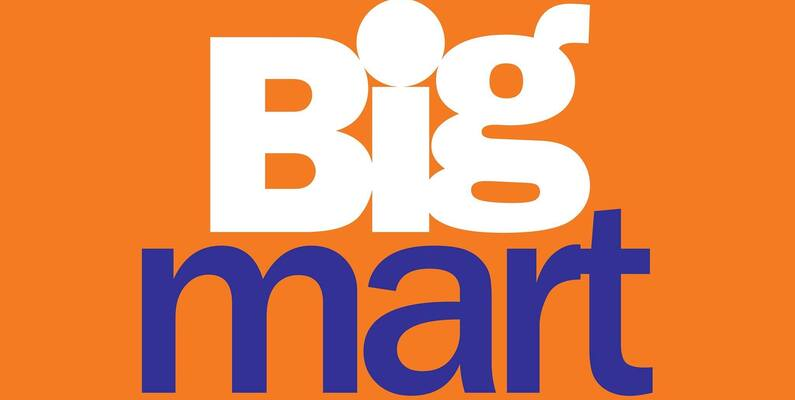

### About Dataset


### Loading the dependencies

In [584]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading and understaning the data

In [585]:
df = pd.read_csv('Train-Set.csv')
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [586]:
# Understanding the dataset
def data_understanding(data):
    # Checking the shape of the dataset
    print('Shape of the dataset: \n', df.shape, '\n')

    # Checking for null values in the dataset
    print('missing values in the dataset: \n', df.isnull().sum(), '\n')

    # Checking for the information of the dataset
    print('Information about the dataset: \n')
    display(df.info())

    # Checking for the description of the dataset
    print('Statistical description of the dataset: \n', df.describe(include=['int', 'float']), '\n')
    print('Categorical description of the dataset: \n', df.describe(include='object'), '\n')

    # Checking for duplicates in the dataset
    print('Duplicates in the datset: \n', df.duplicated().sum(), '\n')

In [587]:
data_understanding(df)

Shape of the dataset: 
 (8523, 12) 

missing values in the dataset: 
 ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64 

Information about the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 no

None

Statistical description of the dataset: 
        Weight  ProductVisibility     MRP  EstablishmentYear  OutletSales
count 7060.00            8523.00 8523.00            8523.00      8523.00
mean    12.86               0.07  140.99            1997.83      2181.29
std      4.64               0.05   62.28               8.37      1706.50
min      4.55               0.00   31.29            1985.00        33.29
25%      8.77               0.03   93.83            1987.00       834.25
50%     12.60               0.05  143.01            1999.00      1794.33
75%     16.85               0.09  185.64            2004.00      3101.30
max     21.35               0.33  266.89            2009.00     13086.96 

Categorical description of the dataset: 
        ProductID FatContent            ProductType OutletID OutletSize  \
count       8523       8523                   8523     8523       6113   
unique      1559          5                     16       10          3   
top        FDW13    Low Fat  Fruits

### Data Cleaning

In [588]:
df.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [589]:
columns_to_clean = ['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales']

In [590]:
def cleaning_data(data, columns):
    for col in columns:
        if col not in data.columns:
            continue
        
        # Replacing error values
        data[col] = data[col].replace(['?', 'nan', 'NaN'], np.nan)

        # Missing values
        if data[col].isnull().sum() > 0:
            if pd.api.types.is_numeric_dtype(data[col]):
                data[col] = data[col].astype(float)
                data[col] = data[col].fillna(data[col].mean())
            else:
                data[col] = data[col].fillna(data[col].mode()[0])
            
        # Duplicates
        if data.duplicated().sum() > 0:
            data = data.drop_duplicates()

    return data

df_copy = cleaning_data(df.copy(), columns_to_clean)
df_copy.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [591]:
# Save the file as cleaned data
df_copy.to_csv('big_mart_cleaned.csv', index=False)

In [592]:
df_copy.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [593]:
# Drop the product Id column
df_copy = df_copy.drop('ProductID', axis=1)

### Exploratory data Analysis

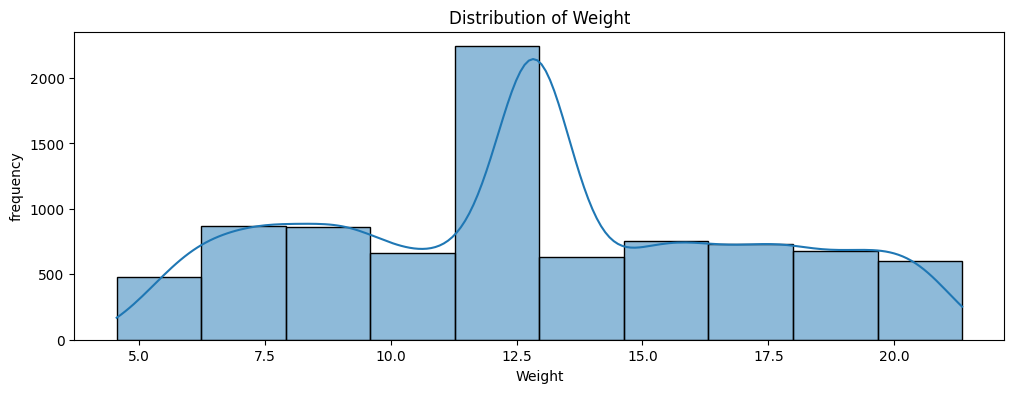

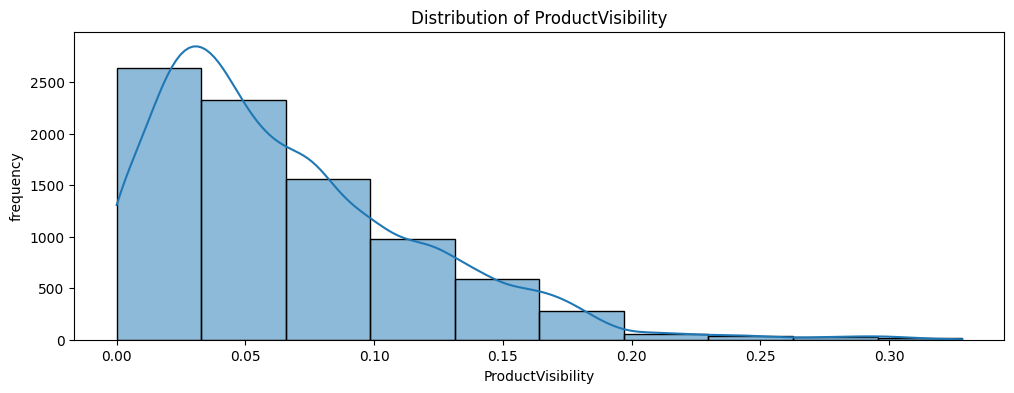

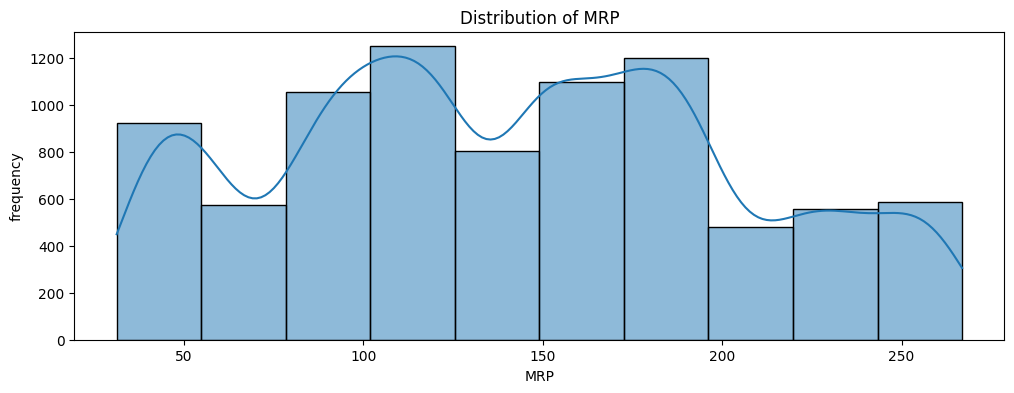

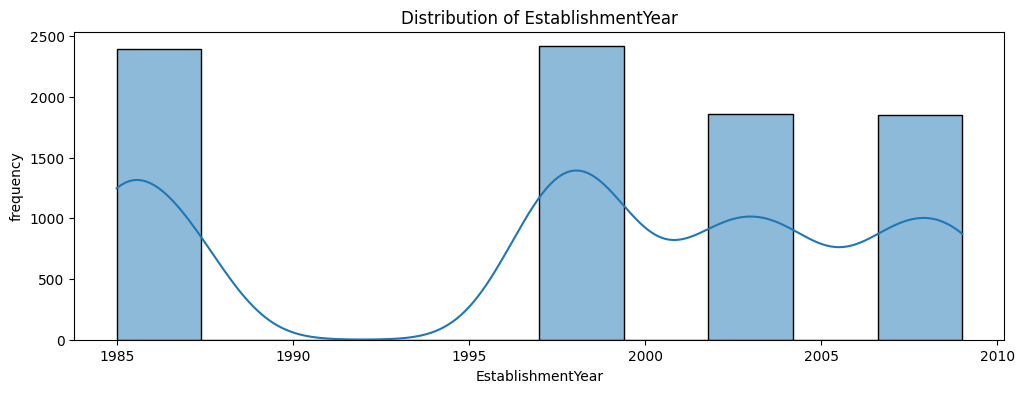

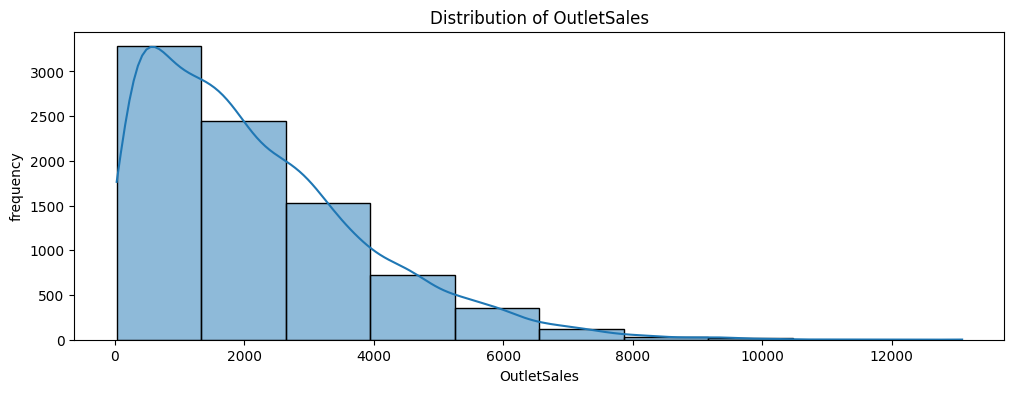

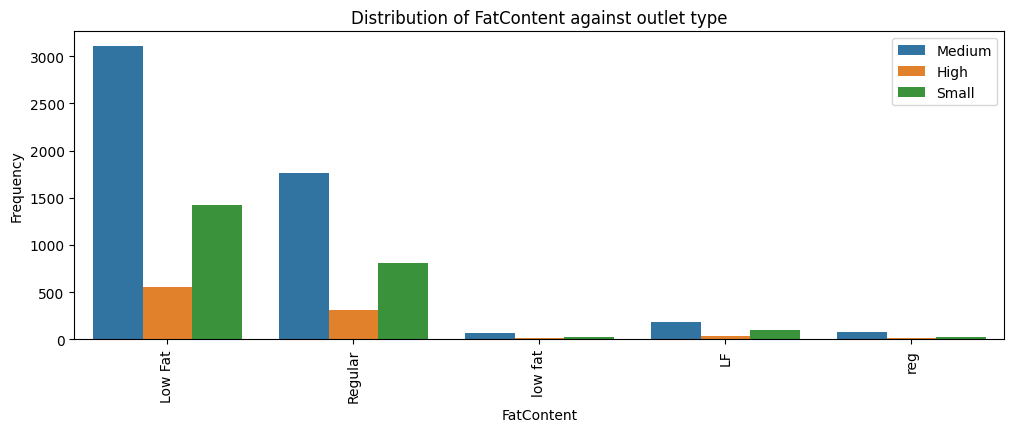

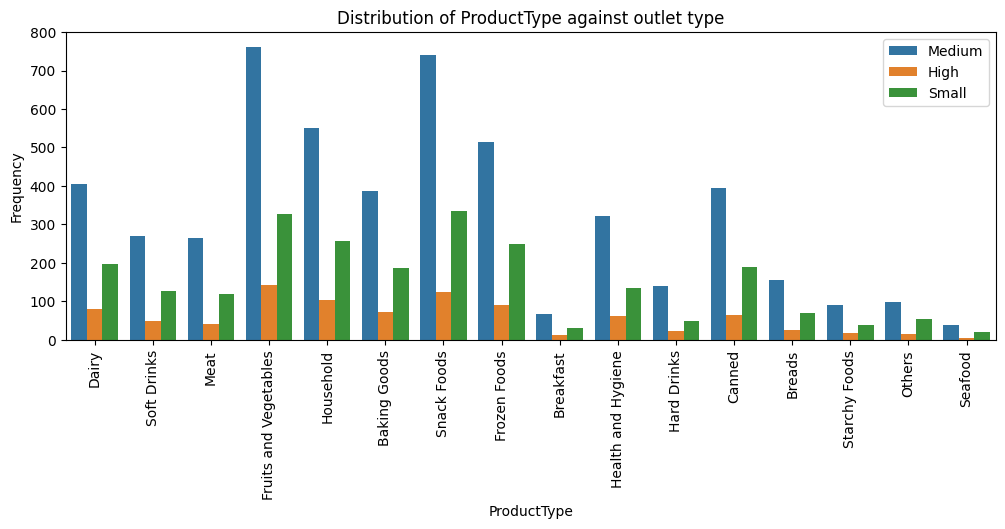

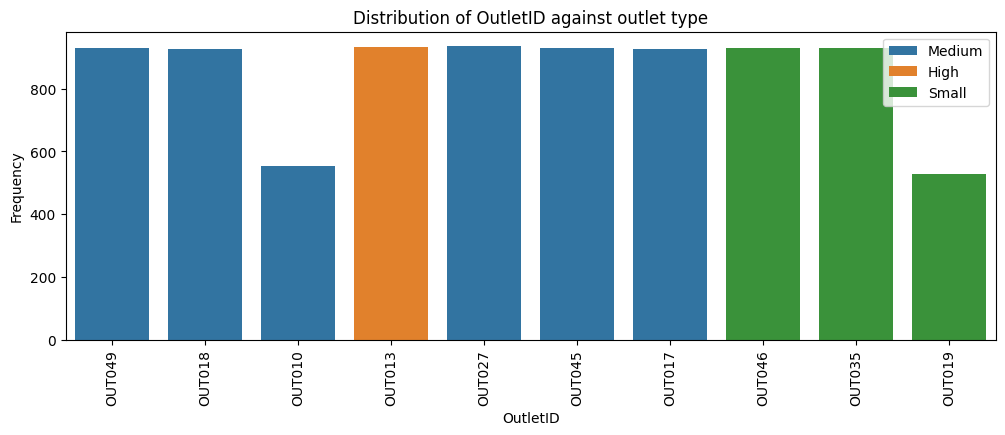

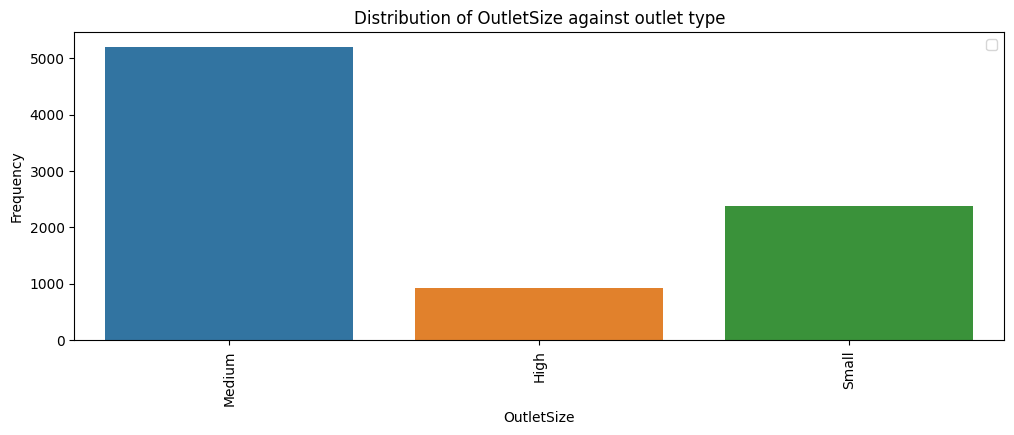

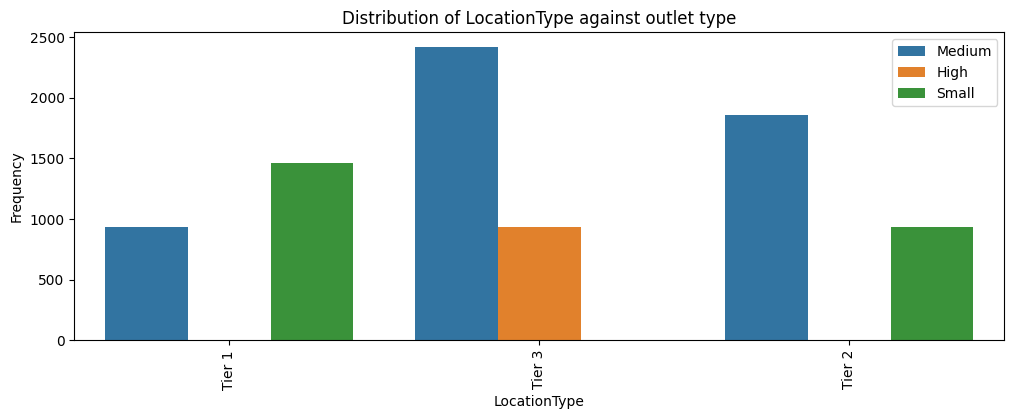

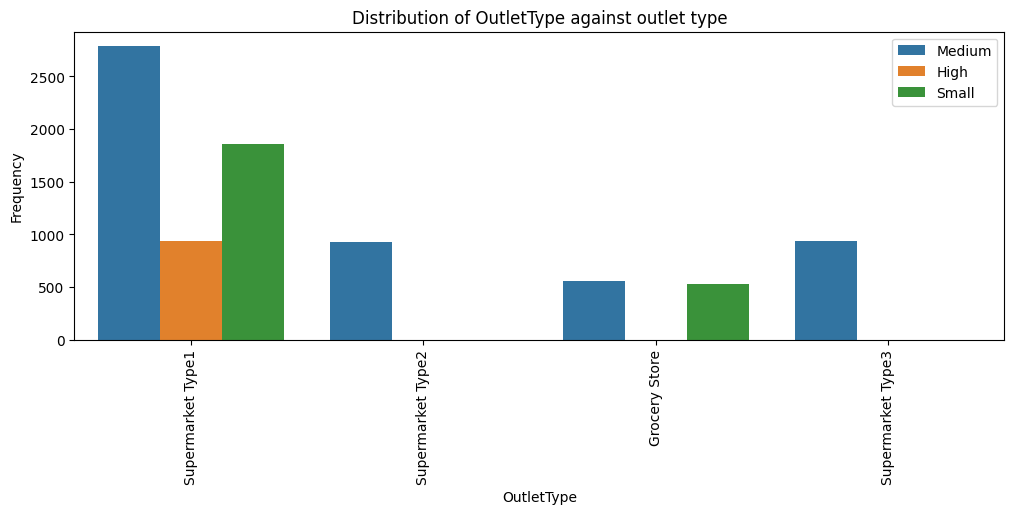

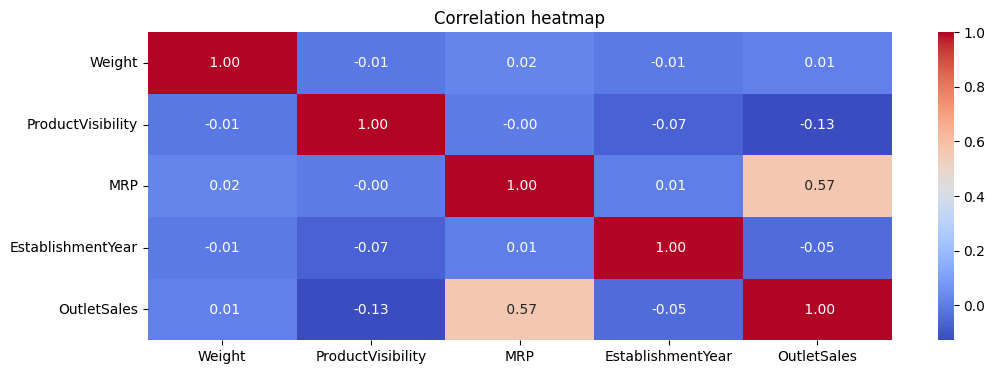

In [594]:
def data_exploration(df):
    # Visualizing the distribution of the numerical columns in the dataset
    for i in df.select_dtypes(include=['int', 'float']):
        plt.figure(figsize=(12, 4))
        sns.histplot(data=df, x=i, bins=10, kde=True)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
        plt.ylabel('frequency')
        plt.show()

    # Visualizing the distribution of the categorical columns in the dataset
    for i in df.select_dtypes(include='object'):
        plt.figure(figsize=(12, 4))
        sns.countplot(data=df, x=i, hue='OutletSize')
        plt.title(f'Distribution of {i} against outlet type')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(12, 4))
    numerical_cols = df.select_dtypes(include=['int', 'float'])
    sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=' .2f')
    plt.title('Correlation heatmap')
    plt.show()
    
data_exploration(df_copy)

### Data Preprocessing

In [595]:
df.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [596]:
##def data_preprocessing(df):
    # Encoding the categorical columns of the dataset
    #cols_to_encode = ['FatContent', 'OutletID', 'OutletType', 'ProductType', 'OutletSize', 'LocationType']
    #from sklearn.preprocessing import LabelEncoder
    #label_encoders = {}
    #
   # for col in cols_to_encode:
      #  if col in df.columns:
        #    le = LabelEncoder()
         #   df[col] = le.fit_transform(df[col].astype(str))
          #  label_encoders[col] = le

    # Scaling the columns in the dataset
    #from sklearn.preprocessing import StandardScaler
    #scaler = StandardScaler()
    #num_cols = df.select_dtypes(include=['int', 'float']).columns
    #df[num_cols] = scaler.fit_transform(df[num_cols])

    #return df, label_encoders, scaler
    

In [597]:
def data_preprocessing(df, label_encoders=None, scaler=None, is_train=True):
    from sklearn.preprocessing import LabelEncoder, StandardScaler

    cols_to_encode = ['FatContent', 'OutletID', 'OutletType', 'ProductType', 'OutletSize', 'LocationType']
    
    if label_encoders is None:
        label_encoders = {}

    # Encode categorical columns
    for col in cols_to_encode:
        if col in df.columns:
            le = label_encoders.get(col, LabelEncoder())
            if is_train:
                df[col] = le.fit_transform(df[col].astype(str))
            else:
                df[col] = le.transform(df[col].astype(str))
            label_encoders[col] = le

    # Scale numeric columns except 'OutletSales'
    num_cols = df.select_dtypes(include=['int', 'float']).columns
    if 'OutletSales' in num_cols:
        num_cols = num_cols.drop('OutletSales')

    if is_train:
        scaler = StandardScaler()
        df[num_cols] = scaler.fit_transform(df[num_cols])
    else:
        df[num_cols] = scaler.transform(df[num_cols])

    return df, label_encoders, scaler


In [598]:
df_processed, label_encoders, scaler = data_preprocessing(df_copy, is_train=True)

In [599]:
data_preprocessing(df_copy)

(      Weight  FatContent  ProductVisibility  ProductType   MRP  OutletID  \
 0      -0.84       -0.78              -0.97        -0.81  1.75      1.51   
 1      -1.64        1.15              -0.91         1.58 -1.49     -1.32   
 2       1.10       -0.78              -0.96         0.71  0.01      1.51   
 3       1.50        1.15              -1.28        -1.25  0.66     -0.26   
 4      -0.93       -0.78              -1.28         0.49 -1.40     -0.61   
 ...      ...         ...                ...          ...   ...       ...   
 8518   -1.42       -0.78              -0.18         1.36  1.18     -0.61   
 8519   -1.06        1.15              -0.37         0.06 -0.53      0.80   
 8520   -0.53       -0.78              -0.60         0.27 -0.90      0.45   
 8521   -1.34        1.15               1.53         1.36 -0.61     -1.32   
 8522    0.46       -0.78              -0.41         1.58 -1.05      1.16   
 
       EstablishmentYear  OutletSize  LocationType  OutletType  OutletSale

In [600]:
columns_scaled = scaler.feature_names_in_

In [601]:
columns_scaled

array(['Weight', 'FatContent', 'ProductVisibility', 'ProductType', 'MRP',
       'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'], dtype=object)

In [602]:
# Splitting into dependent and independent variable
X = df_copy.drop(['OutletSales'], axis=1)
y = df_copy['OutletSales']
print(X.shape, y.shape)

(8523, 10) (8523,)


### Model Build

In [603]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# TEMP: Confirm X and y
print(X.head())
print(y[:5])

# Split your data (even if you'll test later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = model.fit(X_train, X_test, y_train, y_test)
display(models)

   Weight  FatContent  ProductVisibility  ProductType   MRP  OutletID  \
0   -0.84       -0.78              -0.97        -0.81  1.75      1.51   
1   -1.64        1.15              -0.91         1.58 -1.49     -1.32   
2    1.10       -0.78              -0.96         0.71  0.01      1.51   
3    1.50        1.15              -1.28        -1.25  0.66     -0.26   
4   -0.93       -0.78              -1.28         0.49 -1.40     -0.61   

   EstablishmentYear  OutletSize  LocationType  OutletType  
0               0.14       -0.76         -0.08       -0.64  
1               1.33       -0.76          1.10        1.27  
2               0.14       -0.76         -0.08       -0.64  
3               0.02       -0.76          1.10        0.31  
4              -1.29        0.37          1.10       -0.64  
0   3735.14
1    443.42
2   2097.27
3    732.38
4    994.71
Name: OutletSales, dtype: float64


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 10
[LightGBM] [Info] Start training from score 2202.365232


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.60,0.60,1037.69,1.13
HistGradientBoostingRegressor,0.59,0.59,1053.87,0.42
LGBMRegressor,0.58,0.59,1061.19,0.18
RandomForestRegressor,0.56,0.56,1088.85,5.11
ExtraTreesRegressor,0.55,0.55,1103.63,2.16
BaggingRegressor,0.53,0.53,1124.23,0.75
XGBRegressor,0.51,0.52,1144.99,0.33
KNeighborsRegressor,0.51,0.52,1146.84,0.09
MLPRegressor,0.51,0.51,1151.40,3.30


In [604]:
# Building using the MLPRegressor
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor()
reg.fit(X_train, y_train)
MLP_pred = reg.predict(X_test)
display(y_test, MLP_pred)

7503   1743.06
2957    356.87
7031    377.51
1084   5778.48
856    2356.93
         ...  
7205   3004.09
3257    890.84
6346    629.18
6318    253.00
6339    976.73
Name: OutletSales, Length: 1705, dtype: float64

array([ 942.01957676,  589.1334451 ,  435.43771526, ...,  292.56515631,
        333.77452305, 1827.79829969], shape=(1705,))

In [605]:
# Evaluation of the model
from sklearn.metrics import r2_score
print(r2_score(y_test, MLP_pred))

0.5153009096407104


### Hyperparameter Tuning

In [606]:
# Grid search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the model
model = MLPRegressor()

grid_params = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['lgfbs', 'adam', 'sgd'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'random_state': [42],
    'alpha': [0.0001, 0.001, 0.01]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=model,
                     param_grid=grid_params, scoring='r2',
                     cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)
grid_pred = grid_search.predict(X_test)
display(y_test, grid_pred)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


7503   1743.06
2957    356.87
7031    377.51
1084   5778.48
856    2356.93
         ...  
7205   3004.09
3257    890.84
6346    629.18
6318    253.00
6339    976.73
Name: OutletSales, Length: 1705, dtype: float64

array([ 909.09376675,  658.59004782,  667.17545845, ...,  622.49894898,
        778.87184722, 1598.06459946], shape=(1705,))

In [607]:
print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)
best_mlp = grid_search.best_estimator_
print('Best MLP Score: ', best_mlp.score(X_test, y_test))

Best Parameters:  {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'random_state': 42, 'solver': 'sgd'}
Best Score:  0.5797520890462982
Best MLP Score:  0.6069607024966268


### Predictive System

In [608]:
test_set = pd.read_csv('Test-Set.csv')
test_set.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.04,Dairy,87.32,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.12,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [609]:
pred_data = test_set.copy()

In [610]:
pred_data.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')

In [611]:
columns_to_clean_test = ['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType']

In [612]:
# Check if there are strings like '?' or 'nan' left in any of the columns
for col in columns_to_clean_test:
    if col in pred_data.columns:
        print(f"{col}: '?' count = {(pred_data[col] == '?').sum()}, 'nan' count = {(pred_data[col] == 'nan').sum()}, 'NaN' count = {(pred_data[col] == 'NaN').sum()}")


ProductID: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
Weight: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
FatContent: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
ProductVisibility: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
ProductType: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
MRP: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
OutletID: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
EstablishmentYear: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
OutletSize: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
LocationType: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
OutletType: '?' count = 0, 'nan' count = 0, 'NaN' count = 0


In [613]:
pred_data = cleaning_data(pred_data, columns_to_clean_test)

In [614]:
pred_data = pred_data.drop('ProductID', axis=1)

In [615]:
pred_data.isnull().sum()

Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64

In [616]:
pred_data, _, _ = data_preprocessing(pred_data, label_encoders=label_encoders, scaler=scaler, is_train=False)
pred_data

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,1.87,-0.57,-1.14,1.37,-0.53,1.51,0.14,-0.28,-1.37,-0.25
1,-1.08,4.08,-0.54,-0.77,-0.86,-0.96,1.10,-0.28,-0.14,-0.25
2,0.41,-0.57,0.65,0.90,1.62,-1.66,0.02,-0.28,1.09,-1.51
3,-1.31,-0.57,-0.98,1.37,0.23,-0.96,1.10,-0.28,-0.14,-0.25
4,-0.04,0.98,1.02,-0.77,1.50,0.10,-1.53,-0.28,1.09,2.26
...,...,...,...,...,...,...,...,...,...,...
5676,-0.56,0.98,-1.02,1.37,0.01,1.16,-0.10,1.38,-1.37,-0.25
5677,-1.24,0.98,1.49,1.85,0.45,-0.61,1.33,-0.28,1.09,1.00
5678,-0.68,-0.57,0.14,0.18,-0.36,0.80,0.50,-0.28,-0.14,-0.25
5679,0.58,0.98,-1.28,-1.00,1.18,-0.96,1.10,-0.28,-0.14,-0.25


### Testing the Model on the test data

In [617]:
final_test = reg.predict(pred_data)
final_test

array([2010.42740674, 1198.22593407, 2998.90168152, ..., 1196.34016262,
       3078.71034877,  780.85508368], shape=(5681,))

In [618]:
final_grid_test = grid_search.predict(pred_data)
final_grid_test

array([2231.5715034 ,  709.54935512, 1977.73681571, ...,  106.5295157 ,
       2437.91874617,  139.28990695], shape=(5681,))

In [619]:
test_set['OutputSales'] = final_grid_test
test_set

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutputSales
0,FDW58,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,Medium,Tier 1,Supermarket Type1,2231.57
1,FDW14,8.30,reg,0.04,Dairy,87.32,OUT017,2007,NaN,Tier 2,Supermarket Type1,709.55
2,NCN55,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,NaN,Tier 3,Grocery Store,1977.74
3,FDQ58,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,NaN,Tier 2,Supermarket Type1,1390.05
4,FDY38,NaN,Regular,0.12,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3,5866.91
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.01,Snack Foods,141.32,OUT046,1997,Small,Tier 1,Supermarket Type1,3291.89
5677,FDD47,7.60,Regular,0.14,Starchy Foods,169.14,OUT018,2009,Medium,Tier 3,Supermarket Type2,1778.47
5678,NCO17,10.00,Low Fat,0.07,Health and Hygiene,118.74,OUT045,2002,NaN,Tier 2,Supermarket Type1,106.53
5679,FDJ26,15.30,Regular,0.00,Canned,214.62,OUT017,2007,NaN,Tier 2,Supermarket Type1,2437.92
